In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image
sns.set()
np.random.seed(10)

In [4]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(" ", "_")[:-5] for name in iris.feature_names]
class_names = iris.target_names

In [5]:
print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwa kategorii kosaćca: {class_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwa kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


# Eksploracja danych

In [6]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

In [9]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)

In [8]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)

In [10]:
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns=feature_names + ['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
df.describe().T.apply(lambda x: round(x,2))

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
class,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



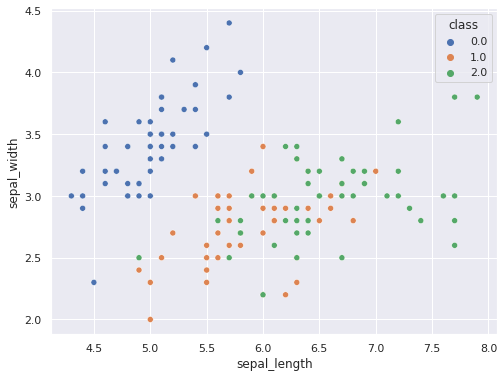

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot('sepal_length', 'sepal_width', hue='class', data=df, legend='full',
                palette=sns.color_palette()[:3])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



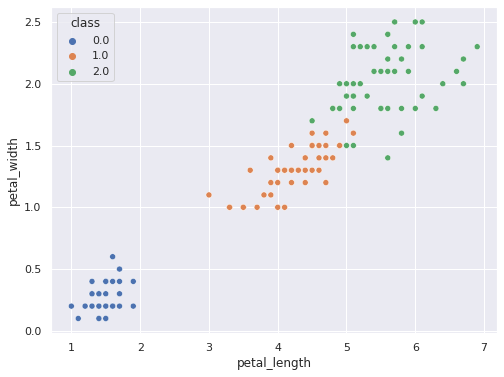

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot('petal_length', 'petal_width', hue='class', data=df, legend='full',
                palette=sns.color_palette()[:3])

In [14]:
df['class'].value_counts()

2.0    50
1.0    50
0.0    50
Name: class, dtype: int64

In [15]:
X = df.copy()
X = X[['petal_length', 'petal_width','class']]
y = X.pop('class')

In [16]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [17]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

In [18]:
X = X.values
y = y.values.astype('int16')

# Budowa klasyfikatora drzewa decyzyjnego

* max_depth = 1

In [19]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=30)
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=30)

### Wykreślenie granic decyzyjnych

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



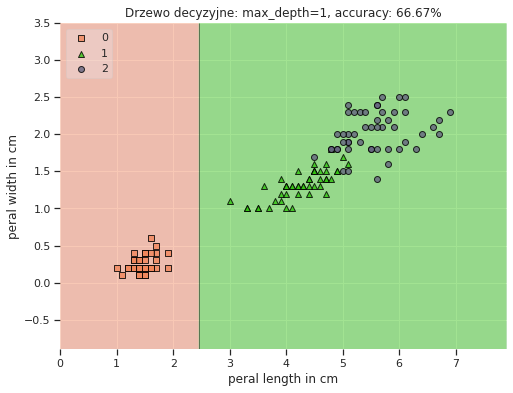

In [20]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(X,y)

plt.figure(figsize=(8,6))
plot_decision_regions(X, y, classifier, legend=2, colors=colors)
plt.xlabel('peral length in cm')
plt.ylabel('peral width in cm')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

#Graf drzewa decyzyjnego

* max_depth=1

In [22]:
from sklearn.tree import export_graphviz

export_graphviz(classifier,
                out_file='iris_tree.dot',
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

## Wyświetlenie grafu drzewa decyzyjnego

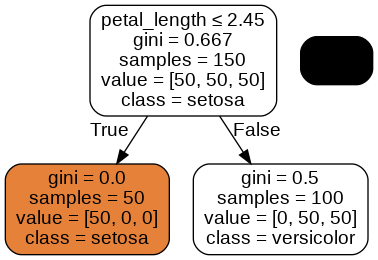

In [27]:
from six import StringIO
#from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
                out_file=dot_data,
                feature_names=feature_names[2:],
                class_names=class_names,
                special_characters=True,
                rounded=True,
                filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=250)

## Budowa funkcji dla modelu drzewa decyzyjnego

In [34]:
def make_decision_tree(max_depth=1):
    # Trenowanie modelu
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
    classifier.fit(X,y)

    # Eksport grafu drzewa
    dot_data = StringIO()
    export_graphviz(classifier,
                    out_file=dot_data,
                    feature_names=feature_names[2:],
                    class_names=class_names,
                    special_characters = True,
                    rounded=True,
                    filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    # Obliczenie dokładności acc
    acc = classifier.score(X, y)

    # Wykreślenie granic decyzyjnych
    colors = '#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(8,6))
    ax = plot_decision_regions(X, y, clf=classifier, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title(f'Drzewo decyzyjne, max_depth={max_depth}, accuracy={acc*100:.2f}%')
    
    return Image(graph.create_png(), width=150 + max_depth * 80)

* max_depth=2

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



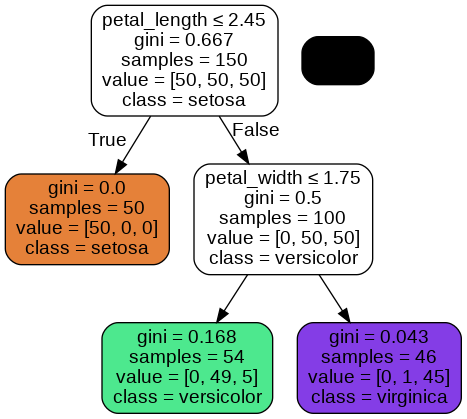

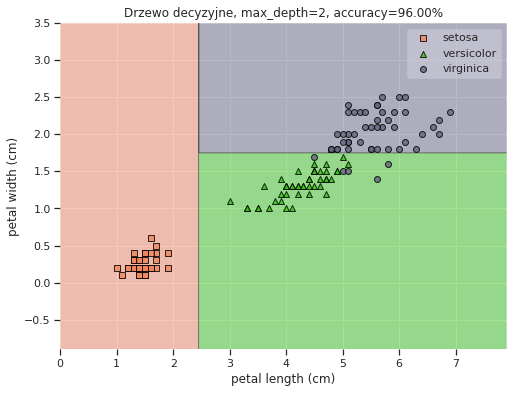

In [35]:
make_decision_tree(2)

max_depth=3

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



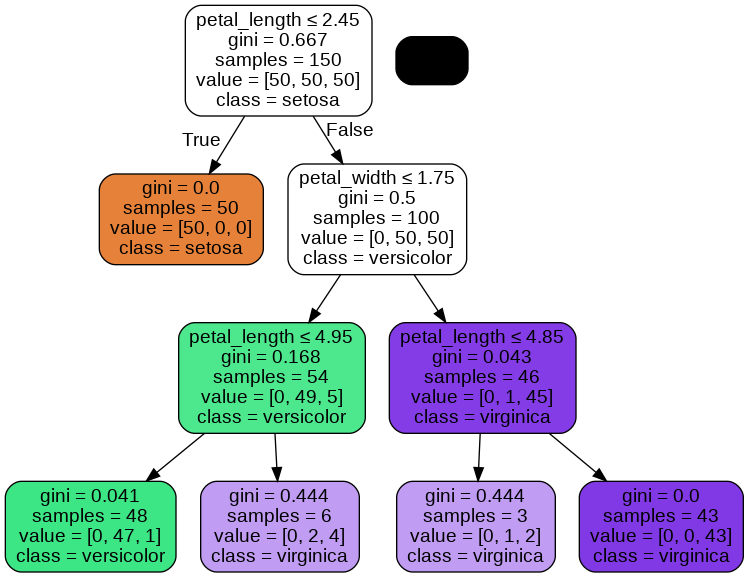

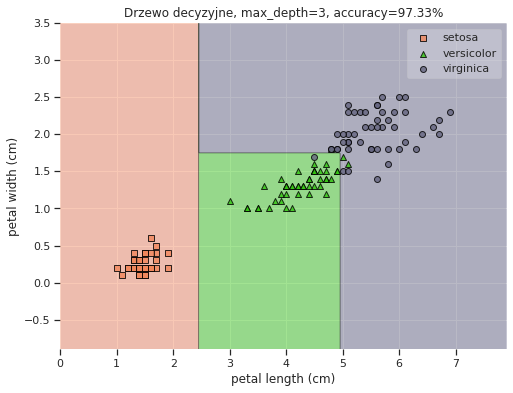

In [36]:
make_decision_tree(3)

max_depth=4

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



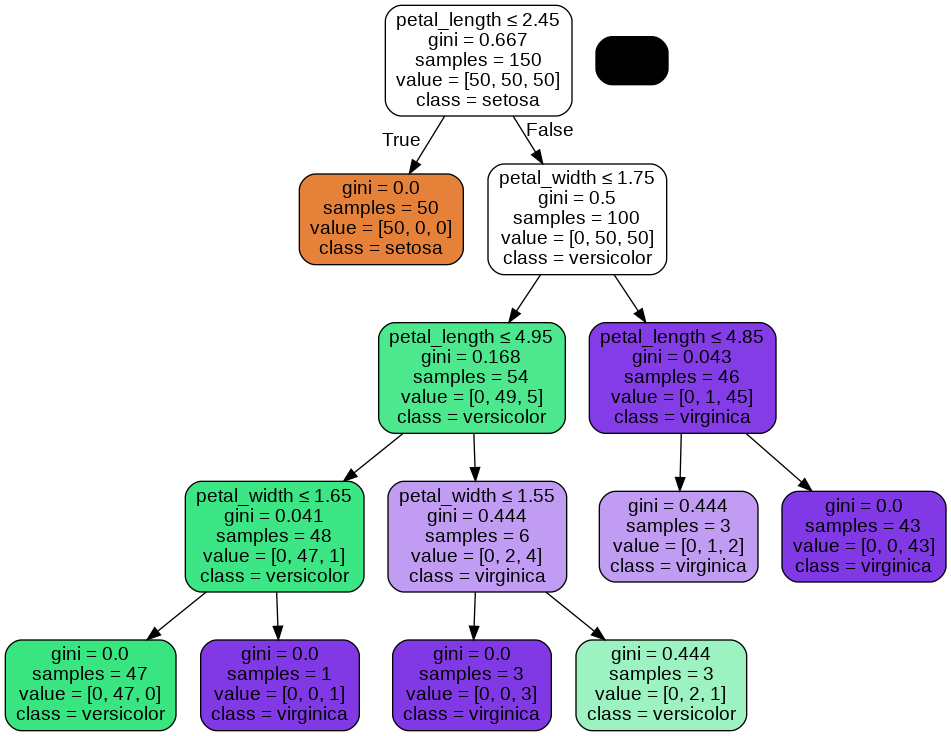

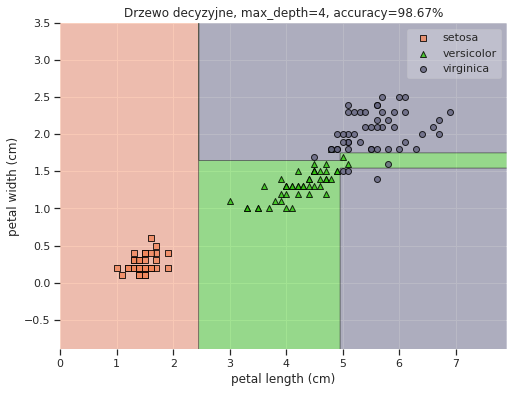

In [37]:
make_decision_tree(4)

max_depth=5

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



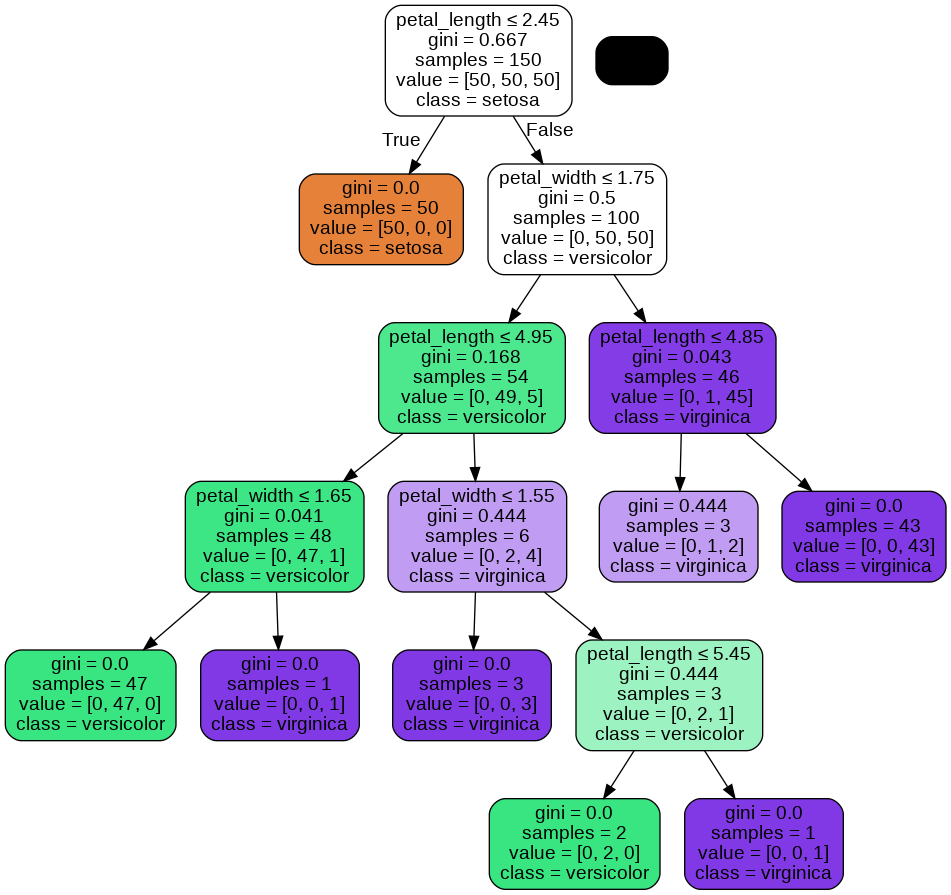

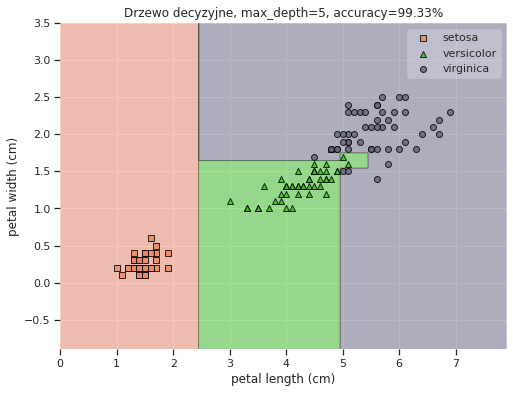

In [38]:
make_decision_tree(5)